In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from __future__ import division
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import cv2

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%matplotlib inline
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

In [5]:
imgX = Image.open("/content/drive/MyDrive/MArylin.JPG")  # open colour image
imgX = imgX.convert('L')
img = np.asarray(imgX)
img = 2*(img > 128).astype(int)-1

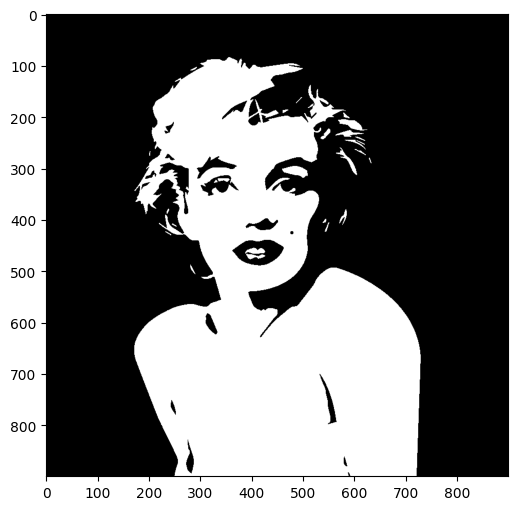

In [6]:
plt.imshow(img,cmap='gray',vmin=-1,vmax=1)
plt.show()

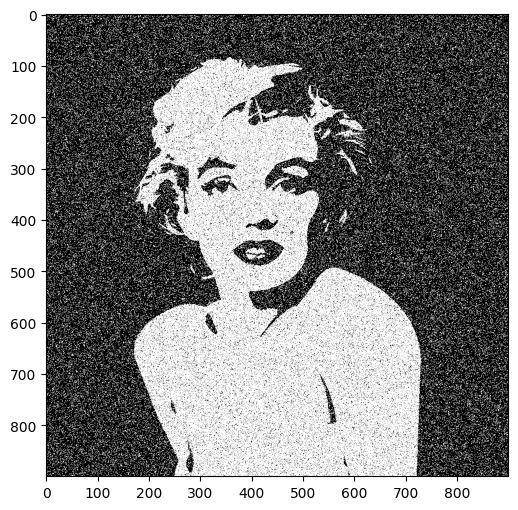

In [7]:

#create a noisy binary image
noise = np.random.random(img.shape)
noise = where(noise<0.15,-1,1)
Y = np.array(img*noise) #observed noisy binary image.

height,width = Y.shape
N = height*width

imgplot = plt.imshow(Y, cmap = cm.Greys_r)
plt.show()

In [8]:

sigma_squared = 1
N = height*width

beta = 0.8 # for arbitrary parameters that reflects our prior belief

T = 10000000 # sufficient number of steps to converge stationary distribution

errorM= np.zeros(T)


X = Y.copy() # Initialize Z from X
for t in range(T):
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)

    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*Y[i,j]*X[i,j]/sigma_squared -2*beta*X[i,j]*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        X[i,j] = - X[i,j] # Update the image

    errorM[t]=np.sum(img != X)


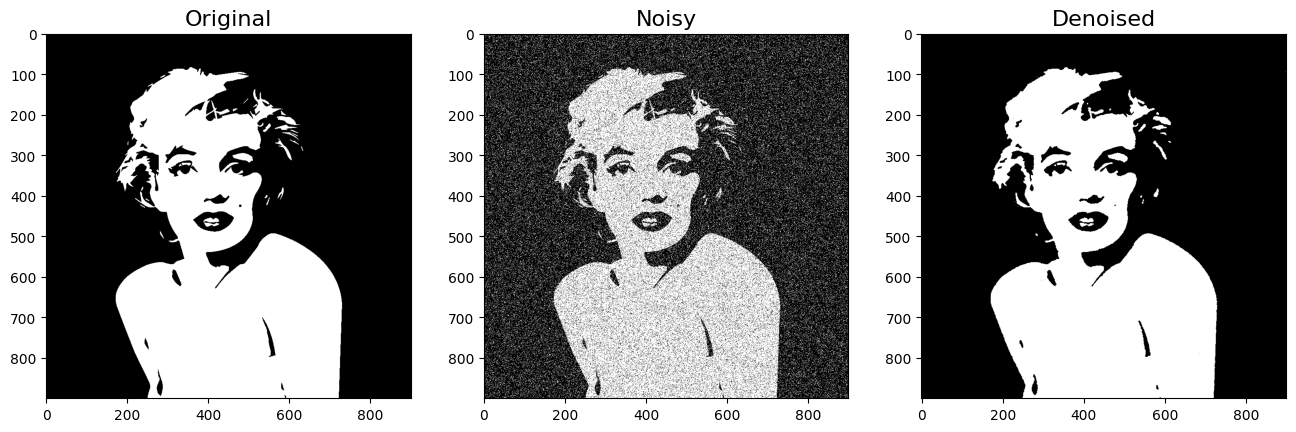

In [9]:
fig, ax = plt.subplots(1,3, figsize=(16,8))
ax[0].imshow(img,cmap='gray',vmin=-1,vmax=1)
ax[0].set_title("Original", fontsize=16)
ax[1].imshow(Y,cmap='gray',vmin=-1,vmax=1)
ax[1].set_title("Noisy", fontsize=16)
ax[2].imshow(X,cmap='gray',vmin=-1,vmax=1)
ax[2].set_title("Denoised", fontsize=16)
plt.show()

In [26]:
np.save('arrayM.npy',errorM)
np.save('ImageM.npy', X)

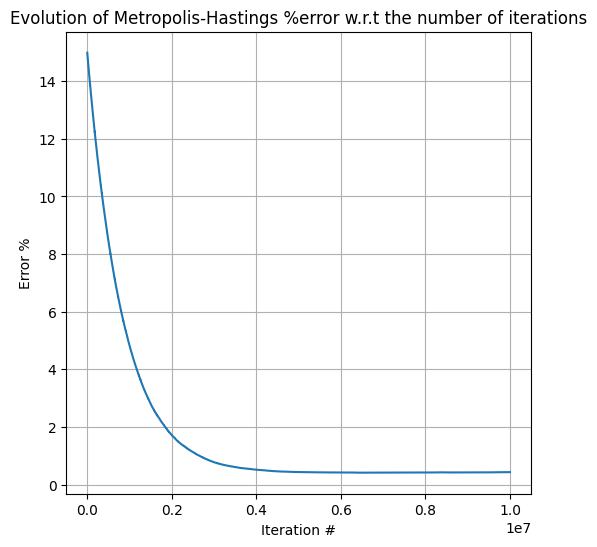

In [27]:
x = np.linspace(0, T, T)
# Plot the array against x
plt.plot(x, (errorM*100/(width*height)))
plt.xlabel('Iteration #')
plt.ylabel('Error %')
plt.title('Evolution of Metropolis-Hastings %error w.r.t the number of iterations')
plt.grid(True)
plt.show()

In [23]:
errorM[5999999]

3391.0

In [24]:
errorM[9999999]

3474.0

In [28]:
np.min(errorM)

3312.0

In [32]:
for i in range(T):
  if(errorM[i]==3312.0):
    print(i)

6621760
6621761
6621762
6621763
6621764
6621765
6621766
6621767
6621768
6621769
6621770
6621771
6621772
6621773
6621774
6621775
6621776
6621777
6621778
6621779
6621780
6621781
6621782
6621783
6621784
6621785
6621786
6621787
6621788
6621789
6621790
6621791
6621792
6621793
6621794
6621795
6621796
6621797
6621798
6621799
6621800
6621801
6621802
6621803
6621804
6621805
6621806
6621807
6621808
6621809
6621810
6621811
6621812
6621813
6621814
6621815
6621816
6621817
6621818
6621819
6621820
6621821
6621822
6621823
6621824
6621825
6621826
6621827
6621828
6621829
6621830
6621831
6621832
6621833
6621834
6621835
6621836
6621837
6621838
6621839
6621840
6621841
6621842
6621843
6621844
6621845
6621846
6621847
6621848
6621849
6621850
6621851
6621852
6621853
6621854
6621855
6621856
6621857
6621858
6621859
6621860
6621861
6621862
6621863
6621864
6621865
6621866
6621867
6621868
6621869
6621870
6621871
6621872
6621873
6621874
6621875
6621876
6621877
6621878
6621879
6621880
6621881
6621882
6621883
6621884


Timing the function

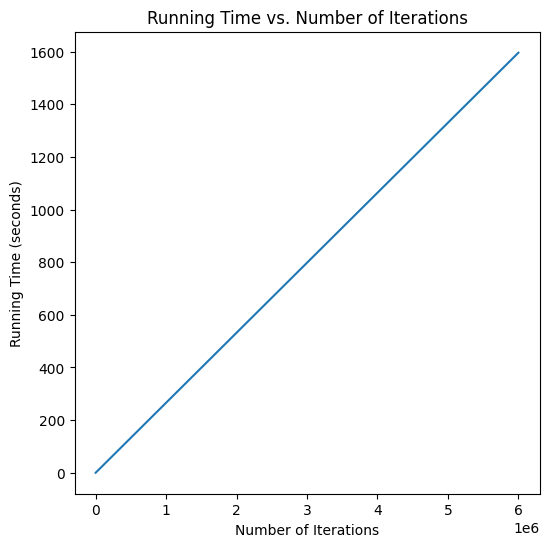

In [35]:
import timeit
import matplotlib.pyplot as plt

T=6000000
errorM= np.zeros(T)
errorM[0]=np.sum(img != X)

def my_function():
    i,j = np.random.choice(height), np.random.choice(width) # randomly choose a coordinate (i,j)

    # Calculate acceptance propability
    # We don't take exponential. Instead, we take the log of random number. This is more stable.
    delta_E = -2*Y[i,j]*X[i,j]/sigma_squared -2*beta*X[i,j]*(np.sum(X[max(i-1,0):i+2,max(j-1,0):j+2]) - X[i,j])

    # We also don't deal with minimum function for acceptance probability
    #   because we don't need to cast it to 1 if it is higher.

    # Flip the pixel if accepted
    if np.log(np.random.rand()) < delta_E:
        X[i,j] = - X[i,j] # Update the image


execution_time = [0] * (T + 1)  # Initialize the list of execution times

# Calculate execution times for the first iteration
execution_time[1] = timeit.timeit(my_function, number=1)

for i in range(2, T + 1):
    execution_time[i] = execution_time[1] * i

iterations = range(1, T + 1)  # Number of iterations



plt.plot(iterations, execution_time[1:])
plt.xlabel('Number of Iterations')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Number of Iterations')
plt.show()